# Exercises

## Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

- 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

- 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

- 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

- 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

- 5. Run through steps 2-4 using a different max_depth value.

- 6. Which model performs better on your in-sample data?

- 7. Which model performs best on your out-of-sample data, the validate set?

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import prepare
import acquire

In [2]:
# df = pd.read_csv('titanic_df.csv')

In [7]:
# df = acquire.get_titanic_data()
# Acquire Step
df = acquire.get_titanic_data()

In [8]:
# df = data('titanic')

In [9]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


def clean_data(df):
    '''
    This function will drop any duplicate observations, 
    drop ['deck', 'embarked', 'class', 'age'], fill missing embark_town with 'Southampton'
    and create dummy vars from sex and embark_town. 
    '''
    df = df.drop_duplicates()
    df = df.drop(columns=['deck', 'embarked', 'class', 'age'])
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df

def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on survived.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.survived)
    return train, validate, test

In [8]:
df.head()

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes


In [101]:
df.tail()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,...,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,sex_male,embark_town_Queenstown,embark_town_Southampton,sex_male,embark_town_Queenstown,embark_town_Southampton
886,886,886,0,2,male,27.0,0,0,13.00,S,...,1,1,0,1,1,0,1,1,0,1
887,887,887,1,1,female,19.0,0,0,30.00,S,...,1,0,0,1,0,0,1,0,0,1
888,888,888,0,3,female,NaN,1,2,23.45,S,...,0,0,0,1,0,0,1,0,0,1
889,889,889,1,1,male,26.0,0,0,30.00,C,...,1,1,0,0,1,0,0,1,0,0
890,890,890,0,3,male,32.0,0,0,7.75,Q,...,1,1,1,0,1,1,0,1,1,0


df = clean_data(df)

def prep_titanic_data(df):
    '''
    This function takes in a df and will drop any duplicate observations, 
    drop ['deck', 'embarked', 'class', 'age'], fill missing embark_town with 'Southampton'
    create dummy vars from sex and embark_town, and perform a train, validate, test split. 
    Returns train, validate, and test DataFrames
    '''
    df = clean_data(df)
    train, validate, test = split_data(df)
    return train, validate, test

train, validate, test = prep_titanic_data(df)
train.info()

In [90]:
df.survived.nunique()

2

In [91]:
df.nunique()

Unnamed: 0                 891
passenger_id               891
survived                     2
pclass                       3
sex                          2
age                         88
sibsp                        7
parch                        7
fare                       248
embarked                     3
class                        3
deck                         7
embark_town                  3
alone                        2
sex_male                     2
embark_town_Queenstown       2
embark_town_Southampton      2
sex_male                     2
embark_town_Queenstown       2
embark_town_Southampton      2
dtype: int64

# What is your baseline prediction? What is your baseline accuracy? 
### remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

baseline:  survived = no

In [92]:
# convert column names to lowercase, replace '.' in column names with '_'
# df.columns = [col.lower().replace('.', '_') for col in df]

In [20]:
df.head()

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes


In [21]:
df.describe()

,class,age,sex,survived
count,1316,1316,1316,1316
unique,3,2,2,2
top,3rd class,adults,man,no
freq,706,1207,869,817


In [33]:
#df.replace([('1st class', 1), ('2nd class', 2), ('3rd class', 3), ('man', 0), ('woman', 1), ('yes', 1), ('no', 0)])
df = df.replace(['1st class', '2nd class', '3rd class', 'man', 'women', 'yes', 'no', 'adults', 'child'], [1, 2, 3, 0, 1, 1, 0, 1, 0])

In [68]:
df.head()

,class,age,sex,survived
1,1,1,0,1
2,1,1,0,1
3,1,1,0,1
4,1,1,0,1
5,1,1,0,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 1 to 1316
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   class     1316 non-null   int64
 1   age       1316 non-null   int64
 2   sex       1316 non-null   int64
 3   survived  1316 non-null   int64
dtypes: int64(4)
memory usage: 51.4 KB


In [53]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [54]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [55]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [56]:
clf = clf.fit(X_train, y_train)

In [57]:
clf

DecisionTreeClassifier(max_depth=3, random_state=123)

import graphviz
from graphviz import Graph

dot_data = export_graphviz(clf, feature_names= X_train.columns, class_names=clf.classes_, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

In [59]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [60]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.57281553, 0.42718447],
       [0.85207101, 0.14792899],
       [0.85207101, 0.14792899],
       [0.85207101, 0.14792899],
       [0.625     , 0.375     ]])

In [61]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.78


In [62]:
confusion_matrix(y_train, y_pred)

array([[443,  14],
       [145, 134]])

In [63]:
y_train.value_counts()

0    457
1    279
Name: survived, dtype: int64

In [64]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,443,14
1,145,134


In [65]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85       457
           1       0.91      0.48      0.63       279

    accuracy                           0.78       736
   macro avg       0.83      0.72      0.74       736
weighted avg       0.81      0.78      0.76       736



In [66]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.81


In [67]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.98      0.87       196
           1       0.95      0.53      0.68       120

    accuracy                           0.81       316
   macro avg       0.86      0.75      0.77       316
weighted avg       0.84      0.81      0.79       316



dot_data = export_graphviz(clf, feature_names= X_train.columns, 
                           class_names=('Yes', 'No'), rounded=True, 
                           filled=True, out_file=None)

### Decision Tree Exercises

In [3]:

# Acquire Step
df = acquire.get_titanic_data()
df.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


In [4]:

# Reduce obvious noise
df = df.set_index("passenger_id")
df = df.drop(columns=["class", "embarked"])

In [5]:

# Drop deck because there are far too many nulls
df = df.drop(columns=["deck"])

In [6]:

# Let's fill embark_town with the most common observation
df.embark_town = df.embark_town.fillna(value=df.embark_town.mode())

In [7]:
# Looking at the distribution of values, it appears that no age subgroup is very close to the population
# If we needed to be more certain, we could perform hypothesis testing
# It looks like there's nothing wildly different about the no age group compared to the population
# So we'll impute using the median age
df.age = df.age.fillna(value=df.age.median())

In [8]:
# Time to encode the encodeable!
dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=[True, True])

# Drop the original columns we encoded
df = df.drop(columns=["sex", "embark_town"])

# Stitch the df and the dummy_df together again
df = pd.concat([df, dummy_df], axis=1)
df.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
passenger_id,,,,,,,,,,
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [9]:
# Time to split!
train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

In [10]:
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [19]:
# modeling
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


In [20]:

# Make the model
tree1 = DecisionTreeClassifier(max_depth=1, random_state=123)

# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.820433,0.760000,0.799197,0.790217,0.797255
recall,0.863192,0.696335,0.799197,0.779764,0.799197
f1-score,0.841270,0.726776,0.799197,0.784023,0.797358
support,307.000000,191.000000,0.799197,498.000000,498.000000


# Exercises

## Continue working in your model file with titanic data to do the following:

- 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

- 2. Evaluate your results using the model score, confusion matrix, and classification report.

- 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

- 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

- 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

### After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [14]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [11]:
# Time to split!
train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

In [12]:
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [28]:
# create a baseline using .mode()

baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


In [41]:
# create the random forest object
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=1, 
                            random_state=123)

In [42]:
# fit the random forest
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, random_state=123)

In [43]:
# Evaluate importance, or weight, of each feature.
print(rf.feature_importances_)

[0.2  0.06 0.04 0.04 0.12 0.11 0.39 0.   0.04]


In [44]:
# make predictions
y_pred = rf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [45]:
# estimate probability
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.64575062, 0.35424938],
       [0.68303155, 0.31696845],
       [0.68913723, 0.31086277],
       [0.40559605, 0.59440395],
       [0.42322053, 0.57677947]])

In [46]:
# Compute the Accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.78


In [47]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[280  27]
 [ 82 109]]


In [48]:
# Create a classificaiton report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       307
           1       0.80      0.57      0.67       191

    accuracy                           0.78       498
   macro avg       0.79      0.74      0.75       498
weighted avg       0.78      0.78      0.77       498



In [49]:
# Evaluate on Out-of-Sample data

print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.76


In [50]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,280,27
1,82,109


In [51]:
# solution example
# Make the model
forest1 = RandomForestClassifier(max_depth=1, random_state=123)

# Fit the model (on train and only train)
tree1 = forest1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = forest1.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.773481,0.801471,0.781124,0.787476,0.784216
recall,0.912052,0.570681,0.781124,0.741366,0.781124
f1-score,0.837070,0.666667,0.781124,0.751868,0.771715
support,307.000000,191.000000,0.781124,498.000000,498.000000


# KNN Exercises

### Continue working in your model file with the titanic dataset.

- 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

- 2. Evaluate your results using the model score, confusion matrix, and classification report.

- 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

- 4. Run through steps 2-4 setting k to 10

- 5. Run through setps 2-4 setting k to 20

- 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

- 7. Which model performs best on our out-of-sample data from validate?



In [52]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from pydataset import data

In [53]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [54]:
# Time to split!
train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

In [55]:
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [56]:
# weights = ['uniform', 'distance']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
# predict on X_train
y_pred = knn.predict(X_train)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,

In [59]:
# calculate probabilities (if you need them)
y_pred_proba = knn.predict_proba(X_train)

In [61]:
y_pred_proba

array([[0.6, 0.4],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4,

In [62]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.79


In [63]:
print(confusion_matrix(y_train, y_pred))

[[256  51]
 [ 52 139]]


In [64]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.831169,0.731579,0.793173,0.781374,0.792973
recall,0.833876,0.727749,0.793173,0.780812,0.793173
f1-score,0.832520,0.729659,0.793173,0.781090,0.793069
support,307.000000,191.000000,0.793173,498.000000,498.000000


In [65]:
# predict on X_validate 
y_pred = knn.predict(X_validate)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [66]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on validate set: 0.71


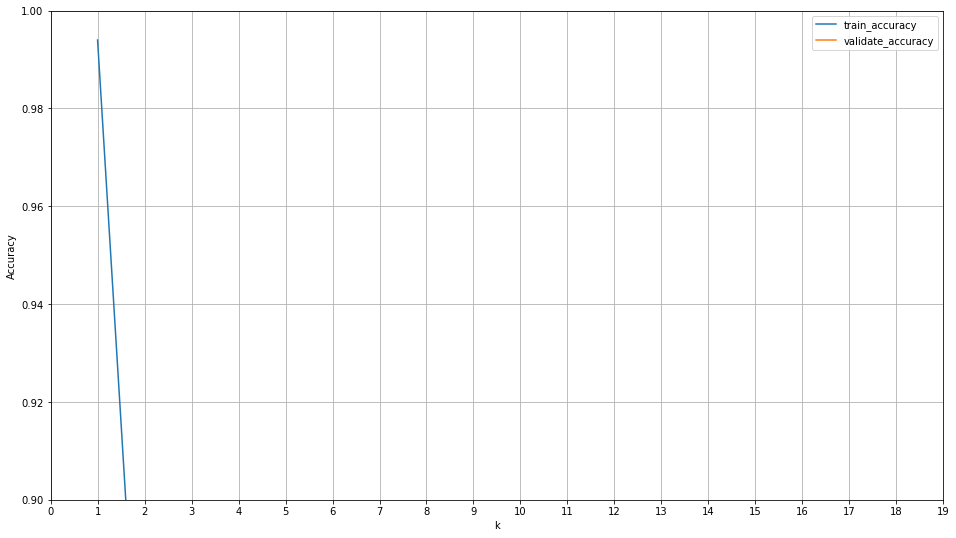

In [82]:
metrics = []

# loop through different values of k
for k in range(1, 5):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylim(0.90, 1)
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,20,1))
plt.grid()

In [83]:
results

,k,train_accuracy,validate_accuracy
0,1,0.993976,0.705607
1,2,0.837349,0.686916
2,3,0.833333,0.752336
3,4,0.799197,0.705607


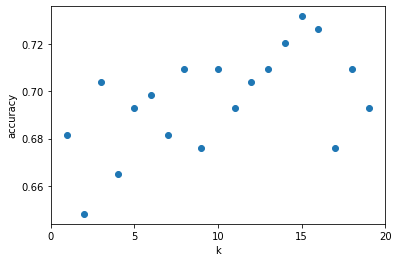

In [84]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [69]:
# weights = ['uniform', 'distance']
# setting to 10
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [70]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [71]:
# predict on X_train
y_pred = knn.predict(X_train)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [72]:
# calculate probabilities (if you need them)
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba

array([[0.3, 0.7],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.5, 0.5],
       [0.2, 0.8],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.7, 0.3],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [0.4, 0.6],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.5, 0.5],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [0.4, 0.6],
       [0.7, 0.3],
       [0.5, 0.5],
       [0.9, 0.1],
       [0.6, 0.4],
       [0.5, 0.5],
       [0.7, 0.3],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.1, 0.9],
       [0.4, 0.6],
       [0.5, 0.5],
       [0.7, 0.3],
       [0.5, 0.5],
       [0.8, 0.2],
       [0.5, 0.5],
       [1. , 0. ],
       [0.9, 0.1],
       [0.6, 0.4],
       [0.7, 0.3],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.1, 0.9],
       [0.6, 0.4],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.4,

In [73]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.75


In [74]:
print(confusion_matrix(y_train, y_pred))

[[276  31]
 [ 95  96]]


In [75]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.743935,0.755906,0.746988,0.749920,0.748526
recall,0.899023,0.502618,0.746988,0.700820,0.746988
f1-score,0.814159,0.603774,0.746988,0.708966,0.733469
support,307.000000,191.000000,0.746988,498.000000,498.000000


In [76]:
# predict on X_validate 
y_pred = knn.predict(X_validate)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [77]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on validate set: 0.71


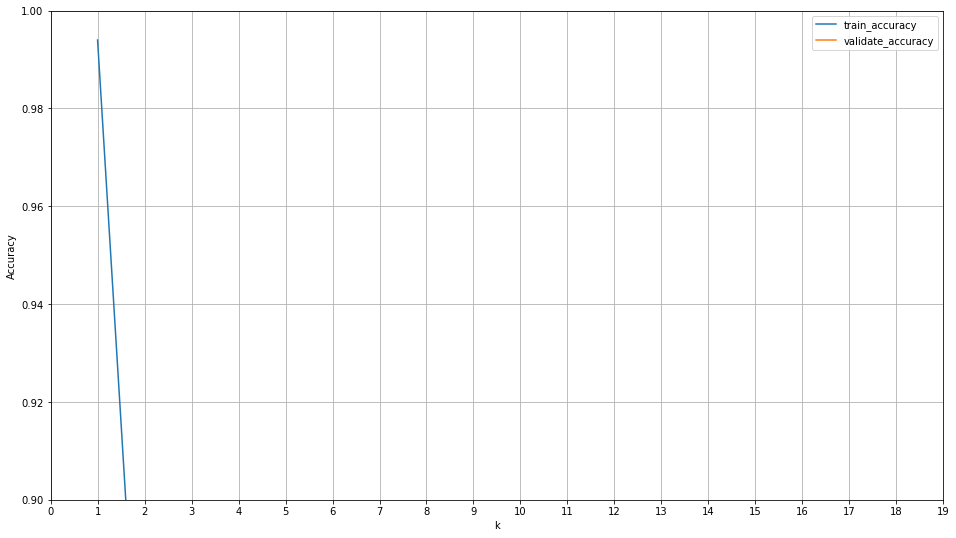

In [78]:
metrics = []

# loop through different values of k
for k in range(1, 10):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylim(0.90, 1)
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,20,1))
plt.grid()

In [79]:
results

,k,train_accuracy,validate_accuracy
0,1,0.993976,0.705607
1,2,0.837349,0.686916
2,3,0.833333,0.752336
3,4,0.799197,0.705607
4,5,0.793173,0.705607
5,6,0.769076,0.719626
6,7,0.765060,0.714953
7,8,0.744980,0.728972
8,9,0.765060,0.700935


In [85]:
# weights = ['uniform', 'distance']
# change to 20
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [86]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [87]:
# predict on X_train
y_pred = knn.predict(X_train)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [88]:
# calculate probabilities (if you need them)
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba

array([[0.55, 0.45],
       [0.4 , 0.6 ],
       [0.7 , 0.3 ],
       [0.6 , 0.4 ],
       [0.3 , 0.7 ],
       [0.55, 0.45],
       [0.6 , 0.4 ],
       [0.75, 0.25],
       [0.45, 0.55],
       [0.6 , 0.4 ],
       [0.6 , 0.4 ],
       [0.75, 0.25],
       [0.55, 0.45],
       [0.6 , 0.4 ],
       [0.55, 0.45],
       [0.7 , 0.3 ],
       [0.95, 0.05],
       [0.45, 0.55],
       [0.65, 0.35],
       [0.85, 0.15],
       [0.6 , 0.4 ],
       [1.  , 0.  ],
       [0.45, 0.55],
       [0.55, 0.45],
       [0.5 , 0.5 ],
       [0.9 , 0.1 ],
       [0.45, 0.55],
       [0.55, 0.45],
       [0.55, 0.45],
       [0.7 , 0.3 ],
       [0.8 , 0.2 ],
       [0.75, 0.25],
       [0.8 , 0.2 ],
       [0.2 , 0.8 ],
       [0.6 , 0.4 ],
       [0.7 , 0.3 ],
       [0.65, 0.35],
       [0.5 , 0.5 ],
       [0.75, 0.25],
       [0.55, 0.45],
       [0.85, 0.15],
       [0.9 , 0.1 ],
       [0.55, 0.45],
       [0.6 , 0.4 ],
       [0.45, 0.55],
       [0.75, 0.25],
       [0.45, 0.55],
       [0.85,

In [89]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.72


In [90]:
print(confusion_matrix(y_train, y_pred))

[[269  38]
 [103  88]]


In [91]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.723118,0.698413,0.716867,0.710765,0.713643
recall,0.876221,0.460733,0.716867,0.668477,0.716867
f1-score,0.792342,0.555205,0.716867,0.673773,0.701392
support,307.000000,191.000000,0.716867,498.000000,498.000000


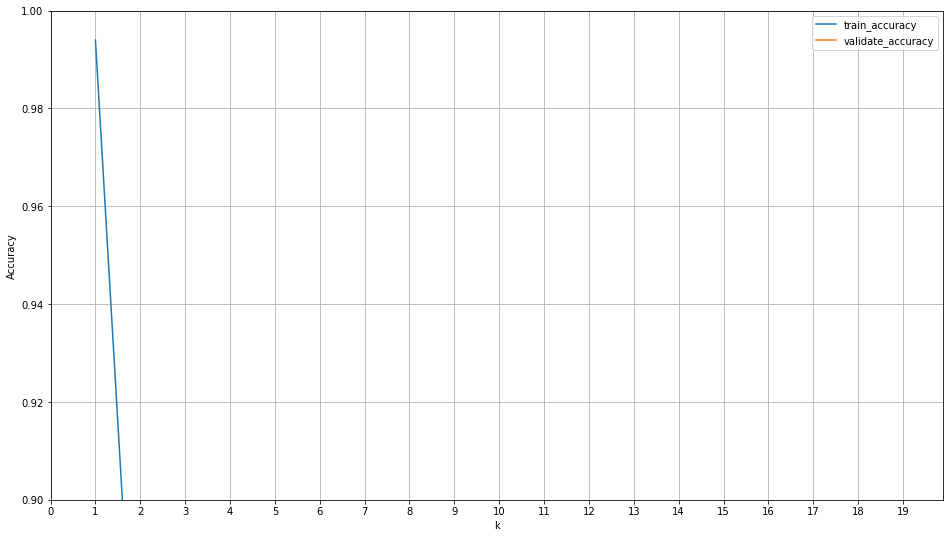

In [94]:
metrics = []

# loop through different values of k
for k in range(1, 20):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylim(0.90, 1)
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,20,1))
plt.grid()

In [95]:
results

,k,train_accuracy,validate_accuracy
0,1,0.993976,0.705607
1,2,0.837349,0.686916
2,3,0.833333,0.752336
3,4,0.799197,0.705607
4,5,0.793173,0.705607
5,6,0.769076,0.719626
6,7,0.765060,0.714953
7,8,0.744980,0.728972
8,9,0.765060,0.700935
9,10,0.746988,0.710280


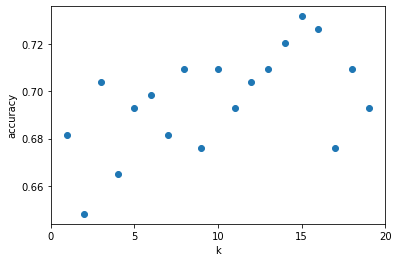

In [96]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [97]:
def explore_univariate(train, cat_vars, quant_vars):
    for var in cat_vars:
        explore_univariate_categorical(train, var)
        print('_________________________________________________________________')
    for col in quant_vars:
        p, descriptive_stats = explore_univariate_quant(train, col)
        plt.show(p)
        print(descriptive_stats)

In [98]:
explore_univariate

<function __main__.explore_univariate(train, cat_vars, quant_vars)>

In [101]:
print(rf.feature_importances_)

[0.2  0.06 0.04 0.04 0.12 0.11 0.39 0.   0.04]
